In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from patchify import patchify, unpatchify
import os
import numpy as np
import matplotlib.patches as patches
import math

2023-04-13 02:36:46.561516: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 02:36:46.704562: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-13 02:36:46.704596: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-13 02:36:47.338267: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
model = tf.keras.models.load_model('/work/Cavity_detection/models/CNN/best_model.h5')


2023-04-13 02:36:48.747555: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /root/venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-04-13 02:36:48.747593: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-13 02:36:48.747611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-8f63fdc3-7b28-4cc7-8735-09f23d070fd3): /proc/driver/nvidia/version does not exist
2023-04-13 02:36:48.747816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

(1, 100, 100, 1)

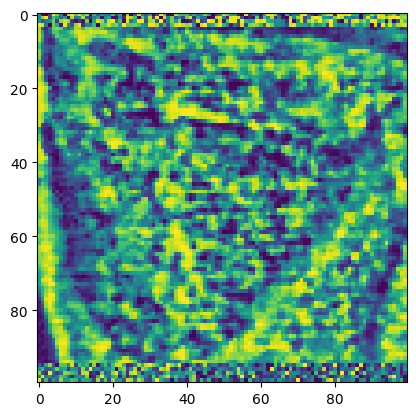

In [3]:
# clahe creation
clahe = cv2.createCLAHE(clipLimit =10.0, tileGridSize=(8,8)) # Parameters used in original paper
image = cv2.imread('/work/Cavity_detection/data/processed/caries/829_5.3482.jpg', cv2.IMREAD_GRAYSCALE)
image = clahe.apply(image)/255.0
plt.imshow(image)

image = np.expand_dims(image, axis=-1)  # Add an extra dimension for the channel
image = np.expand_dims(image, axis=0)  # Add an extra dimension for the batch size

image.shape

In [4]:
model.predict(image)

1/1 [==============================] - 0s 87ms/step


array([[1.]], dtype=float32)

(1, 100, 100, 1)

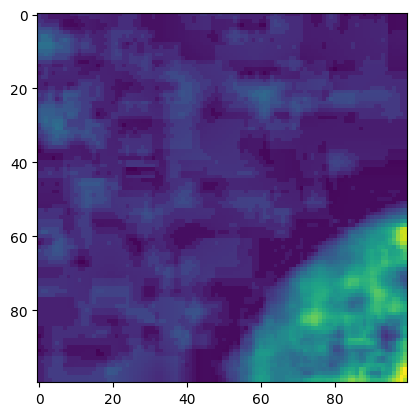

In [5]:
# clahe creation
clahe = cv2.createCLAHE(clipLimit =10.0, tileGridSize=(8,8)) # Parameters used in original paper
image = cv2.imread('/work/Cavity_detection/data/processed/no_caries/142.jpg', cv2.IMREAD_GRAYSCALE)
image = clahe.apply(image)/255.0
no_carie = image
plt.imshow(image)
image = np.expand_dims(image, axis=-1)  # Add an extra dimension for the channel
image = np.expand_dims(image, axis=0)  # Add an extra dimension for the batch size

image.shape

In [6]:
model.predict(image)

1/1 [==============================] - 0s 13ms/step


array([[0.04680889]], dtype=float32)

1/1 [==============================] - 0s 13ms/step


array([[1.]], dtype=float32)

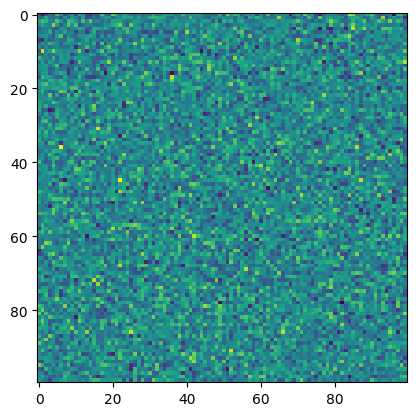

In [7]:
noise = np.random.normal(np.mean(no_carie), np.std(no_carie), (100, 100))
noise_cp = noise
plt.imshow(noise)
noise = np.expand_dims(noise, axis=-1)  # Add an extra dimension for the channel
noise = np.expand_dims(noise, axis=0)  # Add an extra dimension for the batch size
model.predict(noise)


1/1 [==============================] - 0s 13ms/step


array([[0.9264225]], dtype=float32)

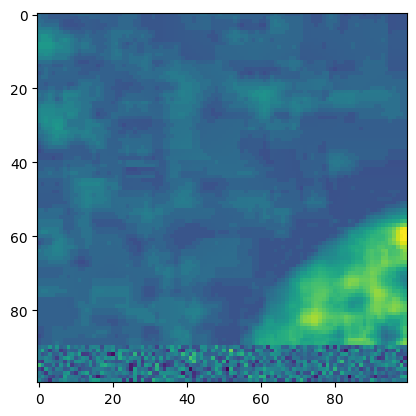

In [8]:
no_carie[90:,:] = noise_cp[90:,:] 
plt.imshow(no_carie)
image = no_carie
image = np.expand_dims(image, axis=-1)  # Add an extra dimension for the channel
image = np.expand_dims(image, axis=0)  # Add an extra dimension for the batch size
model.predict(image)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f63fdc3-7b28-4cc7-8735-09f23d070fd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>